<a href="https://colab.research.google.com/github/Vaycold/Python_DL/blob/main/Image_Transformation/AutoEncoder%EB%A5%BC%20%ED%99%9C%EC%9A%A9%ED%95%9C%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EB%B6%84%ED%95%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goal
```
 - 작게 줄인 PFCN 데이터를 이용하여 사람 영역 추출
 - 큰 사진을 작게 줄이기
 - 이미지에 대한 Autoencoder식 접근


In [1]:
# Import package

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from google.colab import drive
from IPython.display import Image

warnings.filterwarnings('ignore')

In [2]:
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [3]:
os.listdir()

['.config', 'MyDrive', 'sample_data']

In [4]:
os.listdir('MyDrive/MyDrive/fastcampus/DL_300/이미지변환/dataset')

['ReadMe.txt', 'training', 'testing', 'pfcn_small.npz']

## Dataload

In [ ]:
#train_path = 'MyDrive/MyDrive/fastcampus/DL_300/이미지변환/dataset/training' # 
#test_path = 'MyDrive/MyDrive/fastcampus/DL_300/이미지변환/dataset/testing'

In [ ]:
import imageio
x = imageio.imread(train_path+'/00001.png')
y = imageio.imread(train_path+'/00001_matte.png')

# 이러한 방식이 있다고만 알아두자

In [ ]:
print(x.shape, y.shape)

(800, 600, 3) (800, 600)


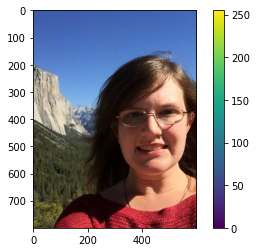

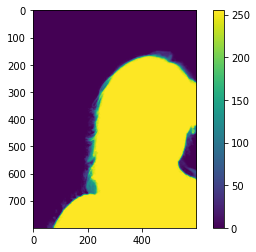

In [ ]:
# visualizing x & y
plt.imshow(x)
plt.colorbar()
plt.show()
plt.imshow(y)
plt.colorbar()
plt.show()

In [ ]:
# Decrease the dataset's size // (800,600,3) -> (100,75,3) // (800,600) -> (100,75)
from skimage.transform import resize
x1 = resize(x, (100,75))
y1 = resize(y, (100,75))

In [ ]:
print(x1.shape, y1.shape)

(100, 75, 3) (100, 75)


In [ ]:
# 위 방식대로 줄일 수도 있지만 그냥 줄인 파일을 다운받아서 사용하기로 하자.

In [5]:
os.listdir('MyDrive/MyDrive/fastcampus/DL_300/이미지변환/dataset')

['ReadMe.txt', 'training', 'testing', 'pfcn_small.npz']

In [6]:
# Data load
dataset_path = 'MyDrive/MyDrive/fastcampus/DL_300/이미지변환/dataset'
pfcn_small = np.load(dataset_path + '/pfcn_small.npz')

In [9]:
pfcn_small['train_images'].shape

(1700, 100, 75, 3)

In [10]:
pfcn_small['train_mattes'].shape

(1700, 100, 75)

In [11]:
pfcn_small['test_images'].shape

(300, 100, 75, 3)

In [12]:
pfcn_small['test_mattes'].shape

(300, 100, 75)

In [13]:
train_images = pfcn_small['train_images']
train_mattes = pfcn_small['train_mattes']
test_images = pfcn_small['test_images']
test_mattes = pfcn_small['test_mattes']

In [16]:
# 0이 아닌 값들 출력
list(filter(lambda x : x !=0, train_images[0].reshape(-1)))[:10]

[0.2362745098039194,
 0.3480392156862709,
 0.6470588235294088,
 0.24509803921568626,
 0.3568627450980406,
 0.6558823529411772,
 0.2549019607843108,
 0.3647058823529383,
 0.6647058823529384,
 0.23725490196078006]

In [17]:
# 이 방법을 더 추천
train_images[train_images!=0]

array([0.23627451, 0.34803922, 0.64705882, ..., 0.05588235, 0.0245098 ,
       0.01470588])

## Pre-processing


In [20]:
# 최대값 최소값 확인
print(train_images.max(), train_images.min())

1.0 0.0


In [22]:
train_mattes[0].shape

(100, 75)

In [ ]:
# mattes의 shape 변경


## Goal
```
 - 작게 줄인 PFCN 데이터를 이용하여 사람 영역 추출
 - 큰 사진을 작게 줄이기
 - 이미지에 대한 Autoencoder식 접근


## Goal
```
 - 작게 줄인 PFCN 데이터를 이용하여 사람 영역 추출
 - 큰 사진을 작게 줄이기
 - 이미지에 대한 Autoencoder식 접근


## Goal
```
 - 작게 줄인 PFCN 데이터를 이용하여 사람 영역 추출
 - 큰 사진을 작게 줄이기
 - 이미지에 대한 Autoencoder식 접근


## Goal
```
 - 작게 줄인 PFCN 데이터를 이용하여 사람 영역 추출
 - 큰 사진을 작게 줄이기
 - 이미지에 대한 Autoencoder식 접근
